In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
df = pd.read_csv('/content/TweetSentiments.csv')
df.shape

(5967, 3)

In [45]:
df.head()

,Id,Category,Tweet,words,strength,prediction
0,6.360000e+17,negative,Not Available,"[Not, Available]",0,neutral
1,6.360000e+17,neutral,IOS 9 App Transport Security. Mm need to check...,"[IOS, 9, App, Transport, Security, Mm, need, t...",2,positive
2,6.360000e+17,neutral,"Mar if you have an iOS device, you should down...","[Mar, if, you, have, an, iOS, device, you, sho...",0,neutral
3,6.360000e+17,negative,@jimmie_vanagon my phone does not run on lates...,"[, jimmie, vanagon, my, phone, does, not, run,...",-2,negative
4,6.360000e+17,positive,Not sure how to start your publication on iOS?...,"[Not, sure, how, to, start, your, publication,...",2,positive


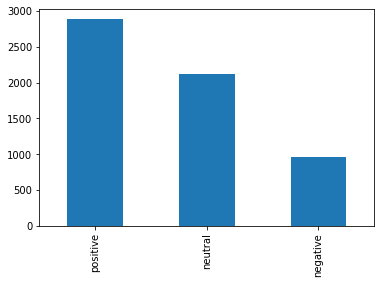

In [5]:
df['Category'].value_counts().plot(kind='bar')

In [6]:
df['words'] = df['Tweet'].astype(str)
df.head()

,Id,Category,Tweet,words
0,6.360000e+17,negative,Not Available,Not Available
1,6.360000e+17,neutral,IOS 9 App Transport Security. Mm need to check...,IOS 9 App Transport Security. Mm need to check...
2,6.360000e+17,neutral,"Mar if you have an iOS device, you should down...","Mar if you have an iOS device, you should down..."
3,6.360000e+17,negative,@jimmie_vanagon my phone does not run on lates...,@jimmie_vanagon my phone does not run on lates...
4,6.360000e+17,positive,Not sure how to start your publication on iOS?...,Not sure how to start your publication on iOS?...


In [7]:
df['words'] = df['words'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,Id,Category,Tweet,words
0,6.360000e+17,negative,Not Available,not available
1,6.360000e+17,neutral,IOS 9 App Transport Security. Mm need to check...,ios 9 app transport security. mm need to check...
2,6.360000e+17,neutral,"Mar if you have an iOS device, you should down...","mar if you have an ios device, you should down..."
3,6.360000e+17,negative,@jimmie_vanagon my phone does not run on lates...,@jimmie_vanagon my phone does not run on lates...
4,6.360000e+17,positive,Not sure how to start your publication on iOS?...,not sure how to start your publication on ios?...


In [8]:
stop = stopwords.words('english')
df['words'] = df['words'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,Id,Category,Tweet,words
0,6.360000e+17,negative,Not Available,available
1,6.360000e+17,neutral,IOS 9 App Transport Security. Mm need to check...,ios 9 app transport security. mm need check 3r...
2,6.360000e+17,neutral,"Mar if you have an iOS device, you should down...","mar ios device, download app too: http://t.co/..."
3,6.360000e+17,negative,@jimmie_vanagon my phone does not run on lates...,@jimmie_vanagon phone run latest ios may accou...
4,6.360000e+17,positive,Not sure how to start your publication on iOS?...,sure start publication ios? we'll live helping...


In [9]:
df['words'] = df['words'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 3))
df.head()

,Id,Category,Tweet,words
0,6.360000e+17,negative,Not Available,available
1,6.360000e+17,neutral,IOS 9 App Transport Security. Mm need to check...,transport security. need check party network s...
2,6.360000e+17,neutral,"Mar if you have an iOS device, you should down...","device, download too: http://t.co/gl3tn2udnd"
3,6.360000e+17,negative,@jimmie_vanagon my phone does not run on lates...,@jimmie_vanagon phone latest account problem t...
4,6.360000e+17,positive,Not sure how to start your publication on iOS?...,sure start publication ios? we'll live helping...


Text(0.5, 1.0, 'Bar chart')

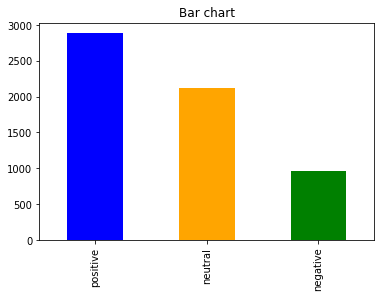

In [10]:
#Explore the data
count_Class=pd.value_counts(df["Category"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange", "green"])
plt.title('Bar chart')
plt.show()

In [0]:
STOPWORDS.update({'https','mobile','september','year','tonight','year','CO','got','may','amp','new','day','one','@'})

(-0.5, 1199.5, 999.5, -0.5)

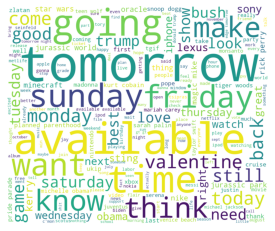

In [12]:
#Visualize the world cloud
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df['words']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
#Get the token
tokens = [tok for tok in str_data.split()]
stop_words = ['>>>','http://t.co/fmtcfuadgj','ios','day','now','out','-','&amp;','was','new','or','may','my','app','3rd','get','will','an','ios','on','if','nan','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because']
tokens_clean = []
for token in tokens:
    if token in stop_words:
        pass
    else:
        tokens_clean.append(token)

In [14]:
print(tokens_clean[0:10])

['available', 'transport', 'security.', 'need', 'check', 'party', 'network', 'supports', 'device,', 'download']


In [0]:
#Creat some functions for cleaning and counting text
def wordfreq (words):
    """Function to generated the frequency distribution of the
given text"""
    word_freq={}
    for tok in words:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
    return word_freq
def sort_tokens(tokens):
    import operator
    sorted_d = sorted(tokens.items(), key=operator.itemgetter(1),reverse=True)
    #print('Dictionary in descending order by value : ',sorted_d)
    #print(sorted_d[:25])
    return(sorted_d)

In [0]:
new_tokens = wordfreq(tokens_clean)
df = sort_tokens(new_tokens)

In [17]:
#Sort the dcitionary on the basis of word freuqncy
import operator
sorted_d = sorted(new_tokens.items(), key=operator.itemgetter(1),reverse=True)
#print('Dictionary in descending order by value : ',sorted_d)
print(sorted_d[:10])

[('available', 567), ('tomorrow', 488), ('like', 310), ('time', 237), ('want', 191), ('jurassic', 188), ('make', 179), ('friday', 176), ('sunday', 166), ('night', 159)]


In [0]:
#Create a Pandas dataframe for word frequency
import pandas as pd
word_frequency = pd.DataFrame(df, columns = ['word', 'frequency'])

,word,frequency
0,available,567
1,tomorrow,488
2,like,310
3,time,237
4,want,191
5,jurassic,188
6,make,179
7,friday,176
8,sunday,166
9,night,159


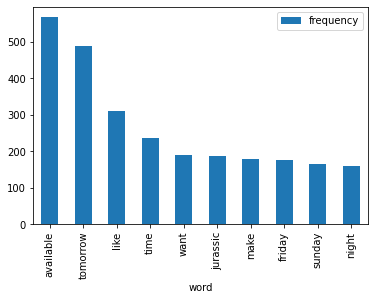

In [19]:
#Explore the word frequency
#Plot word frequency of first few words as a bar plot
word_frequency.head(10)
word_frequency[0:10].plot.bar('word', 'frequency')

In [0]:
# Lexicon Bases Model

In [21]:
df = pd.read_csv('/content/TweetSentiments.csv')
lex_file = open("/content/AFINN-111.csv", encoding='latin' )
df.shape

(5967, 3)

In [22]:
#Create the tokens in a seperate column in the dataframe
df['words'] = df['Tweet'].str.strip().str.split('[\W_]+')
df.head()

,Id,Category,Tweet,words
0,6.360000e+17,negative,Not Available,"[Not, Available]"
1,6.360000e+17,neutral,IOS 9 App Transport Security. Mm need to check...,"[IOS, 9, App, Transport, Security, Mm, need, t..."
2,6.360000e+17,neutral,"Mar if you have an iOS device, you should down...","[Mar, if, you, have, an, iOS, device, you, sho..."
3,6.360000e+17,negative,@jimmie_vanagon my phone does not run on lates...,"[, jimmie, vanagon, my, phone, does, not, run,..."
4,6.360000e+17,positive,Not sure how to start your publication on iOS?...,"[Not, sure, how, to, start, your, publication,..."


In [23]:
corpus = df['words'].values
corpus[0:5]

array([list(['Not', 'Available']),
       list(['IOS', '9', 'App', 'Transport', 'Security', 'Mm', 'need', 'to', 'check', 'if', 'my', '3rd', 'party', 'network', 'pod', 'supports', 'it', 'http', 't', 'co', 'fmtcfUAdgj']),
       list(['Mar', 'if', 'you', 'have', 'an', 'iOS', 'device', 'you', 'should', 'download', 'our', 'app', 'too', 'http', 't', 'co', 'gl3tn2uDnD']),
       list(['', 'jimmie', 'vanagon', 'my', 'phone', 'does', 'not', 'run', 'on', 'latest', 'IOS', 'which', 'may', 'account', 'for', 'problem', 'the', 'other', 'day', 'time', 'it', 'was', 'replaced']),
       list(['Not', 'sure', 'how', 'to', 'start', 'your', 'publication', 'on', 'iOS', 'We', 'll', 'be', 'live', 'helping', 'with', 'ask', 'me', 'anything', 'sessions', 'today', 'and', 'Friday', 'http', 't', 'co', 'KPqqGjjh3x'])],
      dtype=object)

In [24]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
lexicons['Test'] = -10
print(lexicons["Test"])

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [25]:
#For each Message
#For each word in Message
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
for message in corpus:
    score = 0
    for word in message:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
    if (score > 0):
        prediction.append('positive')
    elif (score == 0):
        prediction.append('neutral')        
    else:
        prediction.append('negative')
print(strength)
print(prediction)

[0, 2, 0, -2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 5, -2, 0, -2, 0, 3, -4, 4, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 4, 0, 0, 0, 0, 0, -1, 0, 6, 0, 2, 3, 0, 0, 4, 0, 0, 2, 6, 0, 5, 1, 1, -1, 0, 0, 0, 0, -2, 0, 1, 0, 0, 0, 0, 3, 5, 1, 0, 1, 0, 2, 0, -5, 0, 5, 0, 5, 2, -1, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, -6, 3, 0, -7, -1, 1, 0, 0, 2, 2, 0, 4, 0, 0, 0, 1, 0, 3, -3, 0, 0, 5, -1, 3, 0, 0, 0, 0, 2, 0, 0, -3, -4, 2, 0, -3, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 5, 0, 0, 4, -1, 3, 1, 0, 7, 2, 2, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, -2, 0, -2, 0, 3, 1, 1, 2, 0, -2, 3, 3, 0, 1, 0, 3, 0, 0, -2, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, -4, 0, 0, 0, 2, 0, 0, 0, 1, 0, -2, 0, 0, 0, 3, 1, 0, 0, 0, -1, 0, 3, 0, 0, 0, 1, -4, 0, 6, 0, 0, -1, 0, 0, 3, 2, 3, 0, 8, 0, 0, 0, 0, 0, 4, 0, -2, 0, 0, 1, 0, 0, 0, -2, 0, 2, 3, 0, 0, 4, -2, 1, 0, 4, 2, 3, 0, 0, 0, 7, -4, 7, 5, 1, 1, 0, 0, 1, 0, -4, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 

In [26]:
df['strength'] = strength
df['prediction']= prediction
df.head()

,Id,Category,Tweet,words,strength,prediction
0,6.360000e+17,negative,Not Available,"[Not, Available]",0,neutral
1,6.360000e+17,neutral,IOS 9 App Transport Security. Mm need to check...,"[IOS, 9, App, Transport, Security, Mm, need, t...",2,positive
2,6.360000e+17,neutral,"Mar if you have an iOS device, you should down...","[Mar, if, you, have, an, iOS, device, you, sho...",0,neutral
3,6.360000e+17,negative,@jimmie_vanagon my phone does not run on lates...,"[, jimmie, vanagon, my, phone, does, not, run,...",-2,negative
4,6.360000e+17,positive,Not sure how to start your publication on iOS?...,"[Not, sure, how, to, start, your, publication,...",2,positive


In [27]:
#Explore the results
df.groupby('prediction')['prediction'].count()

prediction
negative    1022
neutral     3036
positive    1909
Name: prediction, dtype: int64

In [28]:
pd.crosstab(df['Category'], df['prediction'])

prediction,negative,neutral,positive
Category,,,
negative,371,382,203
neutral,418,1157,548
positive,233,1497,1158


In [29]:
from sklearn import metrics
print(metrics.classification_report(df['Category'],df['prediction']))

              precision    recall  f1-score   support

    negative       0.36      0.39      0.38       956
     neutral       0.38      0.54      0.45      2123
    positive       0.61      0.40      0.48      2888

    accuracy                           0.45      5967
   macro avg       0.45      0.44      0.44      5967
weighted avg       0.49      0.45      0.45      5967



In [30]:
from sklearn import metrics
print(metrics.accuracy_score(df['Category'],df['prediction']))

0.45014245014245013


In [0]:
##Build a naive Bayesian model
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
import numpy as np

In [32]:
#Create Bag of Words (BoW) using CountVectoriser
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["Tweet"])
np.shape(X)

(5967, 14886)

In [33]:
#Transform the class_label to 1-0 (recode)
y=df["Category"].map({'neutral':1,'negative':0,'positive':2})

#Create train and test samples
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3997, 14886), (1970, 14886)]


In [34]:
#Build a naive Bayesian model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
print(accuracy_score(y_test,prediction))

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

0.550761421319797


In [35]:
print(prediction)

[0 2 1 ... 2 0 0]


In [36]:
test_df = pd.DataFrame(y_test)
test_df['predictions'] = prediction
test_df.head()

,Category,predictions
5714,2,0
810,2,2
2488,0,1
2941,1,0
4681,2,2


In [37]:
#Confusionn matrix for Naive Bayes
pd.crosstab(test_df.Category, test_df.predictions)

predictions,0,1,2
Category,,,
0,157,91,73
1,167,242,296
2,78,180,686


In [0]:
#Build Random Forest model

In [0]:
#importing libs
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
prediction = rf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,prediction)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.47918781725888326

In [41]:
print(prediction)

[2 2 2 ... 2 2 2]


In [42]:
test_df = pd.DataFrame(y_test)
test_df['predictions'] = prediction
test_df.head()

,Category,predictions
5714,2,2
810,2,2
2488,0,2
2941,1,2
4681,2,2


In [43]:
#Confusionn matrix for RF
pd.crosstab(test_df.Category, test_df.predictions)

predictions,2
Category,
0,321
1,705
2,944


In [0]:
#In this experiment 
# Lexicon Bases Model has Accuracy_Score of 0.45014245014245013
# naive Bayesian model has Accuracy_Score of 0.550761421319797
# Random Forest model has Accuracy_Score of 0.47918781725888326